<a href="https://colab.research.google.com/github/kkipngenokoech/Material-Science/blob/main/fall/radials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For angular momentum quantum number l = 1:
The possible energy levels are: E_n = -1 / (2*n^2) Hartrees, where n = 2, 3, 4, ...
Example convergent energies:
For n = 2, E = -0.1250 Hartrees = -3.4014 eV
For n = 3, E = -0.0556 Hartrees = -1.5117 eV


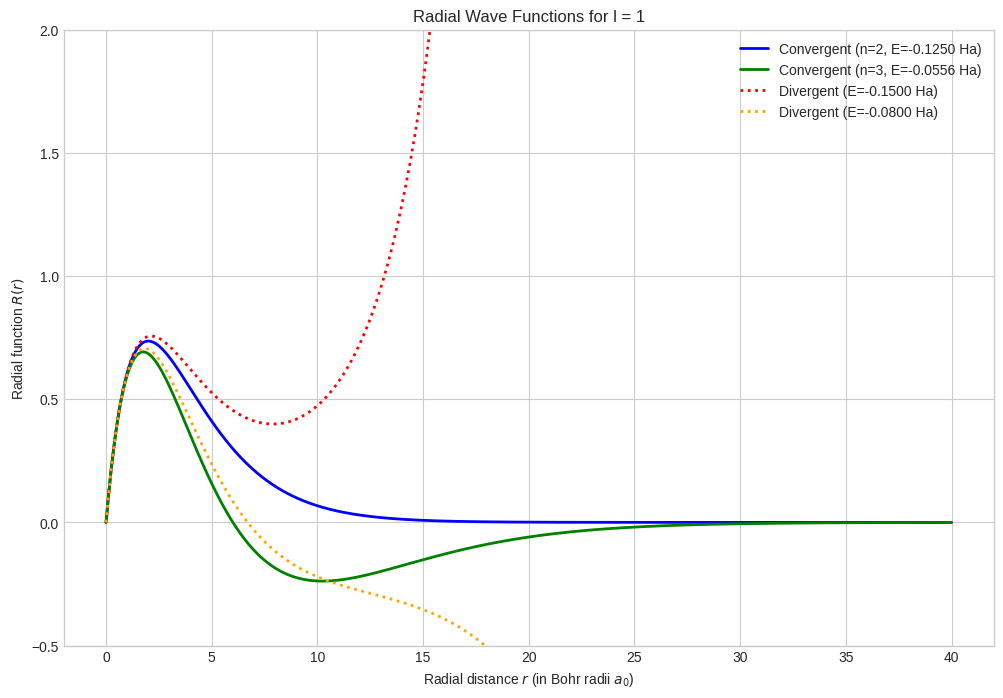

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# We will use atomic units for simplicity where hbar = me = e = 4*pi*epsilon0 = 1
# This makes the energy in Hartrees and length in Bohr radii.
# 1 Hartree = 27.211386245988 eV

def radial_equation(r, y, l, E):
    """
    The radial Schrödinger equation for a hydrogen atom as a system of
    two first-order ODEs.
    y[0] = R(r)
    y[1] = dR/dr

    The equation is derived from the standard form:
    d^2R/dr^2 + (2/r) * dR/dr + (2/r - l*(l+1)/r^2 + E) * R = 0
    where the potential V(r) = -1/r in atomic units.

    We rearrange it to get the second derivative:
    d^2R/dr^2 = (-2/r) * dR/dr + (l*(l+1)/r^2 - 2/r - 2*E) * R
    Note: The sign on the potential term and E were corrected for standard atomic unit form.

    The system of first-order ODEs is:
    dy[0]/dr = y[1]
    dy[1]/dr = d^2R/dr^2
    """
    if r == 0:
        # Special case for r=0 to avoid division by zero.
        # This is handled by starting the integration at a small, non-zero r.
        return [y[1], 0]

    R = y[0]
    dR_dr = y[1]
    d2R_dr2 = (-2/r) * dR_dr + (l * (l + 1) / r**2 - 2 / r - 2 * E) * R
    return [dR_dr, d2R_dr2]

def solve_radial_eq(l, E, r_max=40, num_points=1000):
    """
    Solves the radial Schrödinger equation for a given l and E.
    The integration starts from a small non-zero value of r to avoid the singularity.
    The initial conditions are set according to the boundary condition at the origin.
    For small r, the radial function R(r) is proportional to r^l.
    Therefore, R'(r) is proportional to l*r^(l-1).
    We can set our initial conditions at a very small r.

    Initial Condition (Boundary Condition at r -> 0):
    For l=0 (s-orbitals), R(r) is non-zero, R'(r) ~ 0. We can start with y0 = [1, 0].
    For l>0, R(r) -> 0, so R(r) ~ r^(l).

    The provided MATLAB code uses a slightly different transformation, but the
    underlying physics of the boundary condition is the same.
    """
    r_start = 1e-6
    if l == 0:
        y0 = [1.0, 0.0]
    else:
        # Based on R(r) ~ r^l, we have R'(r) ~ l*r^(l-1)
        # Here we use the standard initial conditions.
        y0 = [r_start**(l), l * r_start**(l-1)]

    r_span = (r_start, r_max)
    r_eval = np.linspace(r_start, r_max, num_points)

    # Use 'solve_ivp' to solve the initial value problem
    sol = solve_ivp(
        lambda r, y: radial_equation(r, y, l, E),
        r_span,
        y0,
        t_eval=r_eval,
        rtol=1e-8,
        atol=1e-8
    )

    return sol.t, sol.y[0]

def plot_solutions(l, E_convergent, E_divergent_1, E_divergent_2):
    """
    Solves and plots the solutions for a given l and different E values.
    This demonstrates the second boundary condition: only for certain E values
    does the solution converge to zero as r goes to infinity.
    """
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 8))

    # Plot convergent solutions
    r_conv1, R_conv1 = solve_radial_eq(l, E_convergent[0])
    plt.plot(r_conv1, R_conv1, label=f'Convergent (n={E_convergent[2]}, E={E_convergent[0]:.4f} Ha)', color='blue', linewidth=2)

    r_conv2, R_conv2 = solve_radial_eq(l, E_convergent[1])
    plt.plot(r_conv2, R_conv2, label=f'Convergent (n={E_convergent[3]}, E={E_convergent[1]:.4f} Ha)', color='green', linewidth=2)

    # Plot divergent solutions
    r_div1, R_div1 = solve_radial_eq(l, E_divergent_1)
    plt.plot(r_div1, R_div1, ':', label=f'Divergent (E={E_divergent_1:.4f} Ha)', color='red', linewidth=2)

    r_div2, R_div2 = solve_radial_eq(l, E_divergent_2)
    plt.plot(r_div2, R_div2, ':', label=f'Divergent (E={E_divergent_2:.4f} Ha)', color='orange', linewidth=2)

    plt.title(f'Radial Wave Functions for l = {l}')
    plt.xlabel('Radial distance $r$ (in Bohr radii $a_0$)')
    plt.ylabel('Radial function $R(r)$')
    plt.ylim(-0.5, 2.0)  # Adjust plot limits to better visualize the behavior
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    l_value = 1  # Example: Choose l=1 (p-orbitals)

    # The first possible value for n is n = l + 1
    n1 = l_value + 1
    # The second possible value for n is n = l + 2
    n2 = l_value + 2

    # The energy levels are given by the formula: E_n = -1 / (2*n^2) in Hartrees
    E_n1 = -1.0 / (2 * n1**2)
    E_n2 = -1.0 / (2 * n2**2)

    print(f"For angular momentum quantum number l = {l_value}:")
    print(f"The possible energy levels are: E_n = -1 / (2*n^2) Hartrees, where n = {n1}, {n1+1}, {n1+2}, ...")
    print(f"Example convergent energies:")
    print(f"For n = {n1}, E = {E_n1:.4f} Hartrees = {E_n1 * 27.211:.4f} eV")
    print(f"For n = {n2}, E = {E_n2:.4f} Hartrees = {E_n2 * 27.211:.4f} eV")

    # Choose some divergent energies that are close to the correct values
    E_div_1 = -0.15  # Divergent energy
    E_div_2 = -0.08  # Another divergent energy

    # Plotting the solutions
    plot_solutions(l_value, [E_n1, E_n2, n1, n2], E_div_1, E_div_2)


Plot saved as wave_functions_and_energies.png


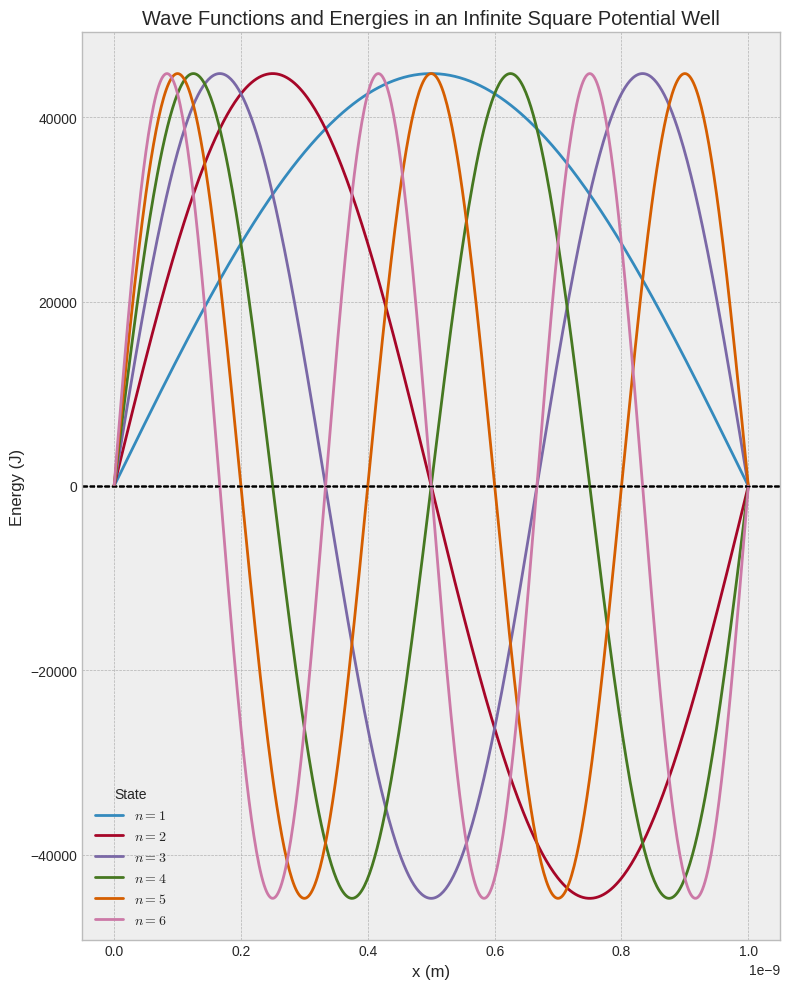

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
hbar = 1.0545718e-34  # J*s
m_e = 9.10938356e-31  # kg
a = 1.0e-9  # 1 nm

# Define the range for x
x = np.linspace(0, a, 500)

# Function to calculate energy
def get_energy(n, a, hbar, m):
    """Calculates the energy level for a given quantum number n."""
    return (n**2 * np.pi**2 * hbar**2) / (2 * m * a**2)

# Function to calculate the wave function
def get_wave_function(x, n, a):
    """Calculates the wave function for a given quantum number n."""
    A = np.sqrt(2/a)
    return A * np.sin(n * np.pi * x / a)

# Create the plot
plt.style.use('bmh')
plt.figure(figsize=(8, 10))

# Plot the energy levels and wave functions for n=1 to 6
for n in range(1, 7):
    # Calculate energy
    E_n = get_energy(n, a, hbar, m_e)

    # Calculate wave function
    psi_n = get_wave_function(x, n, a)

    # Plot the shifted wave function
    plt.plot(x, psi_n + E_n, label=f'$n={n}$')

    # Plot the energy line
    plt.axhline(y=E_n, color='black', linestyle='--', linewidth=1)

# Add labels and title
plt.title('Wave Functions and Energies in an Infinite Square Potential Well')
plt.xlabel('x (m)')
plt.ylabel('Energy (J)')
plt.legend(title='State')
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('wave_functions_and_energies.png')

print("Plot saved as wave_functions_and_energies.png")

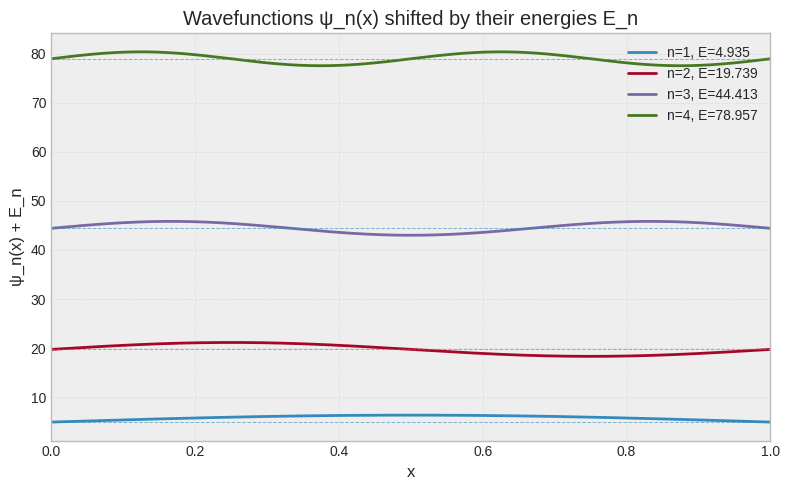

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 1.0       # width of the well
hbar = 1.0    # Planck's reduced constant (set to 1 for convenience)
m = 1.0       # mass of the particle (set to 1)
n_list = [1, 2, 3, 4]   # quantum numbers to plot
x = np.linspace(0, a, 1000)  # x range inside the well

# Energy levels
def En(n, hbar=1.0, m=1.0, a=1.0):
    return (n**2 * np.pi**2 * hbar**2) / (2 * m * a**2)

# Wavefunction (normalized)
def psi_n(n, x, a=1.0):
    A = np.sqrt(2.0 / a)
    return A * np.sin(n * np.pi * x / a)

# --- Plot 1: wavefunctions shifted by E_n ---
plt.figure(figsize=(8, 5))
for n in n_list:
    psi = psi_n(n, x, a=a)
    level = En(n, hbar=hbar, m=m, a=a)
    plt.plot(x, psi + level, label=f'n={n}, E={level:.3f}')
    plt.hlines(level, 0, a, linestyles='dashed', linewidth=0.7, alpha=0.6)

plt.title('Wavefunctions ψ_n(x) shifted by their energies E_n')
plt.xlabel('x')
plt.ylabel('ψ_n(x) + E_n')
plt.xlim(0, a)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Save first figure
plt.savefig("wavefunctions_shifted.png", dpi=300)
plt.show()
plt.show()

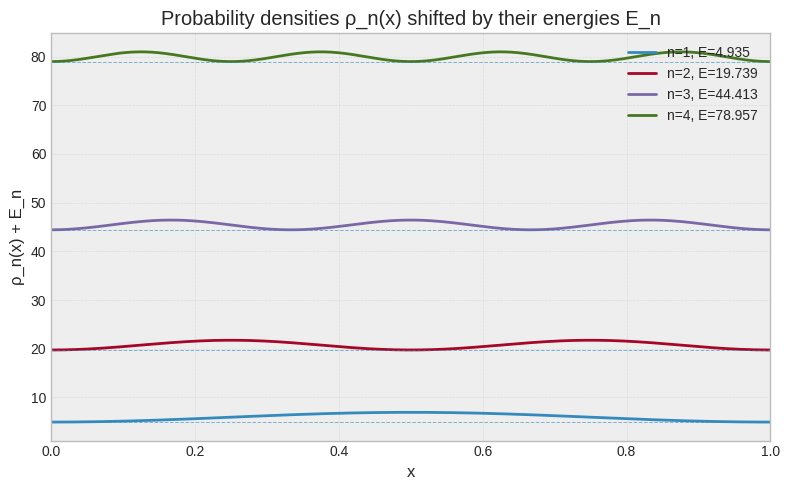

In [11]:

# --- Plot 2: probability densities shifted by E_n ---
plt.figure(figsize=(8, 5))
for n in n_list:
    psi = psi_n(n, x, a=a)
    rho = psi**2
    level = En(n, hbar=hbar, m=m, a=a)
    plt.plot(x, rho + level, label=f'n={n}, E={level:.3f}')
    plt.hlines(level, 0, a, linestyles='dashed', linewidth=0.7, alpha=0.6)

plt.title('Probability densities ρ_n(x) shifted by their energies E_n')
plt.xlabel('x')
plt.ylabel('ρ_n(x) + E_n')
plt.xlim(0, a)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
